In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

### Data Understanding

Objective: to predict the occurrence of a systemic crisis from the variables Banking Crisis, Domestic Debt in Default, Sovereign External Debt Default, Currency Crisis, Inflation Crisis that occurred in 13 African Countries (1860 to 2014).

- Systemic Crisis is a financial crisis that affects the entire financial system.
- Banking Crisis is a condition in which the banking system of a country or region experiences serious disruption resulting in the inability of banks to carry out their basic functions, namely providing financial services such as loans, savings, and liquidity to the public and businesses.
- Domestic Debt in Default is a failure to pay domestic debt. Domestic debt is issued by the government in local currency.
- Sovereign External Debt Default is a failure to pay foreign debt. Foreign debt is issued by the government in foreign currency.
- Currency Crisis is a country's currency experiencing a sharp and sudden decline in value.
- Inflation Crisis is a rapid and high increase in the price of goods and services on a continuous basis.

In [2]:
# Load Dataset
df = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

In [3]:
df.shape

(1059, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [6]:
# Checking Null Value
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [7]:
# Get Columns Name
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [3]:
# Count value categories every column
temp = ['systemic_crisis','domestic_debt_in_default', 'sovereign_external_debt_default', 'currency_crises', 'inflation_crises', 'banking_crisis']

for col in temp:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df[col].value_counts(), '\n')

systemic_crisis 
--------------------
systemic_crisis
0    977
1     82
Name: count, dtype: int64 

domestic_debt_in_default 
--------------------
domestic_debt_in_default
0    1017
1      42
Name: count, dtype: int64 

sovereign_external_debt_default 
--------------------
sovereign_external_debt_default
0    897
1    162
Name: count, dtype: int64 

currency_crises 
--------------------
currency_crises
0    923
1    132
2      4
Name: count, dtype: int64 

inflation_crises 
--------------------
inflation_crises
0    922
1    137
Name: count, dtype: int64 

banking_crisis 
--------------------
banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64 



In [3]:
# Dealing with outlier
# Drop outlier (just little amount)
df = df[df['currency_crises'] != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1055 non-null   int64  
 1   cc3                              1055 non-null   object 
 2   country                          1055 non-null   object 
 3   year                             1055 non-null   int64  
 4   systemic_crisis                  1055 non-null   int64  
 5   exch_usd                         1055 non-null   float64
 6   domestic_debt_in_default         1055 non-null   int64  
 7   sovereign_external_debt_default  1055 non-null   int64  
 8   gdp_weighted_default             1055 non-null   float64
 9   inflation_annual_cpi             1055 non-null   float64
 10  independence                     1055 non-null   int64  
 11  currency_crises                  1055 non-null   int64  
 12  inflation_crises         

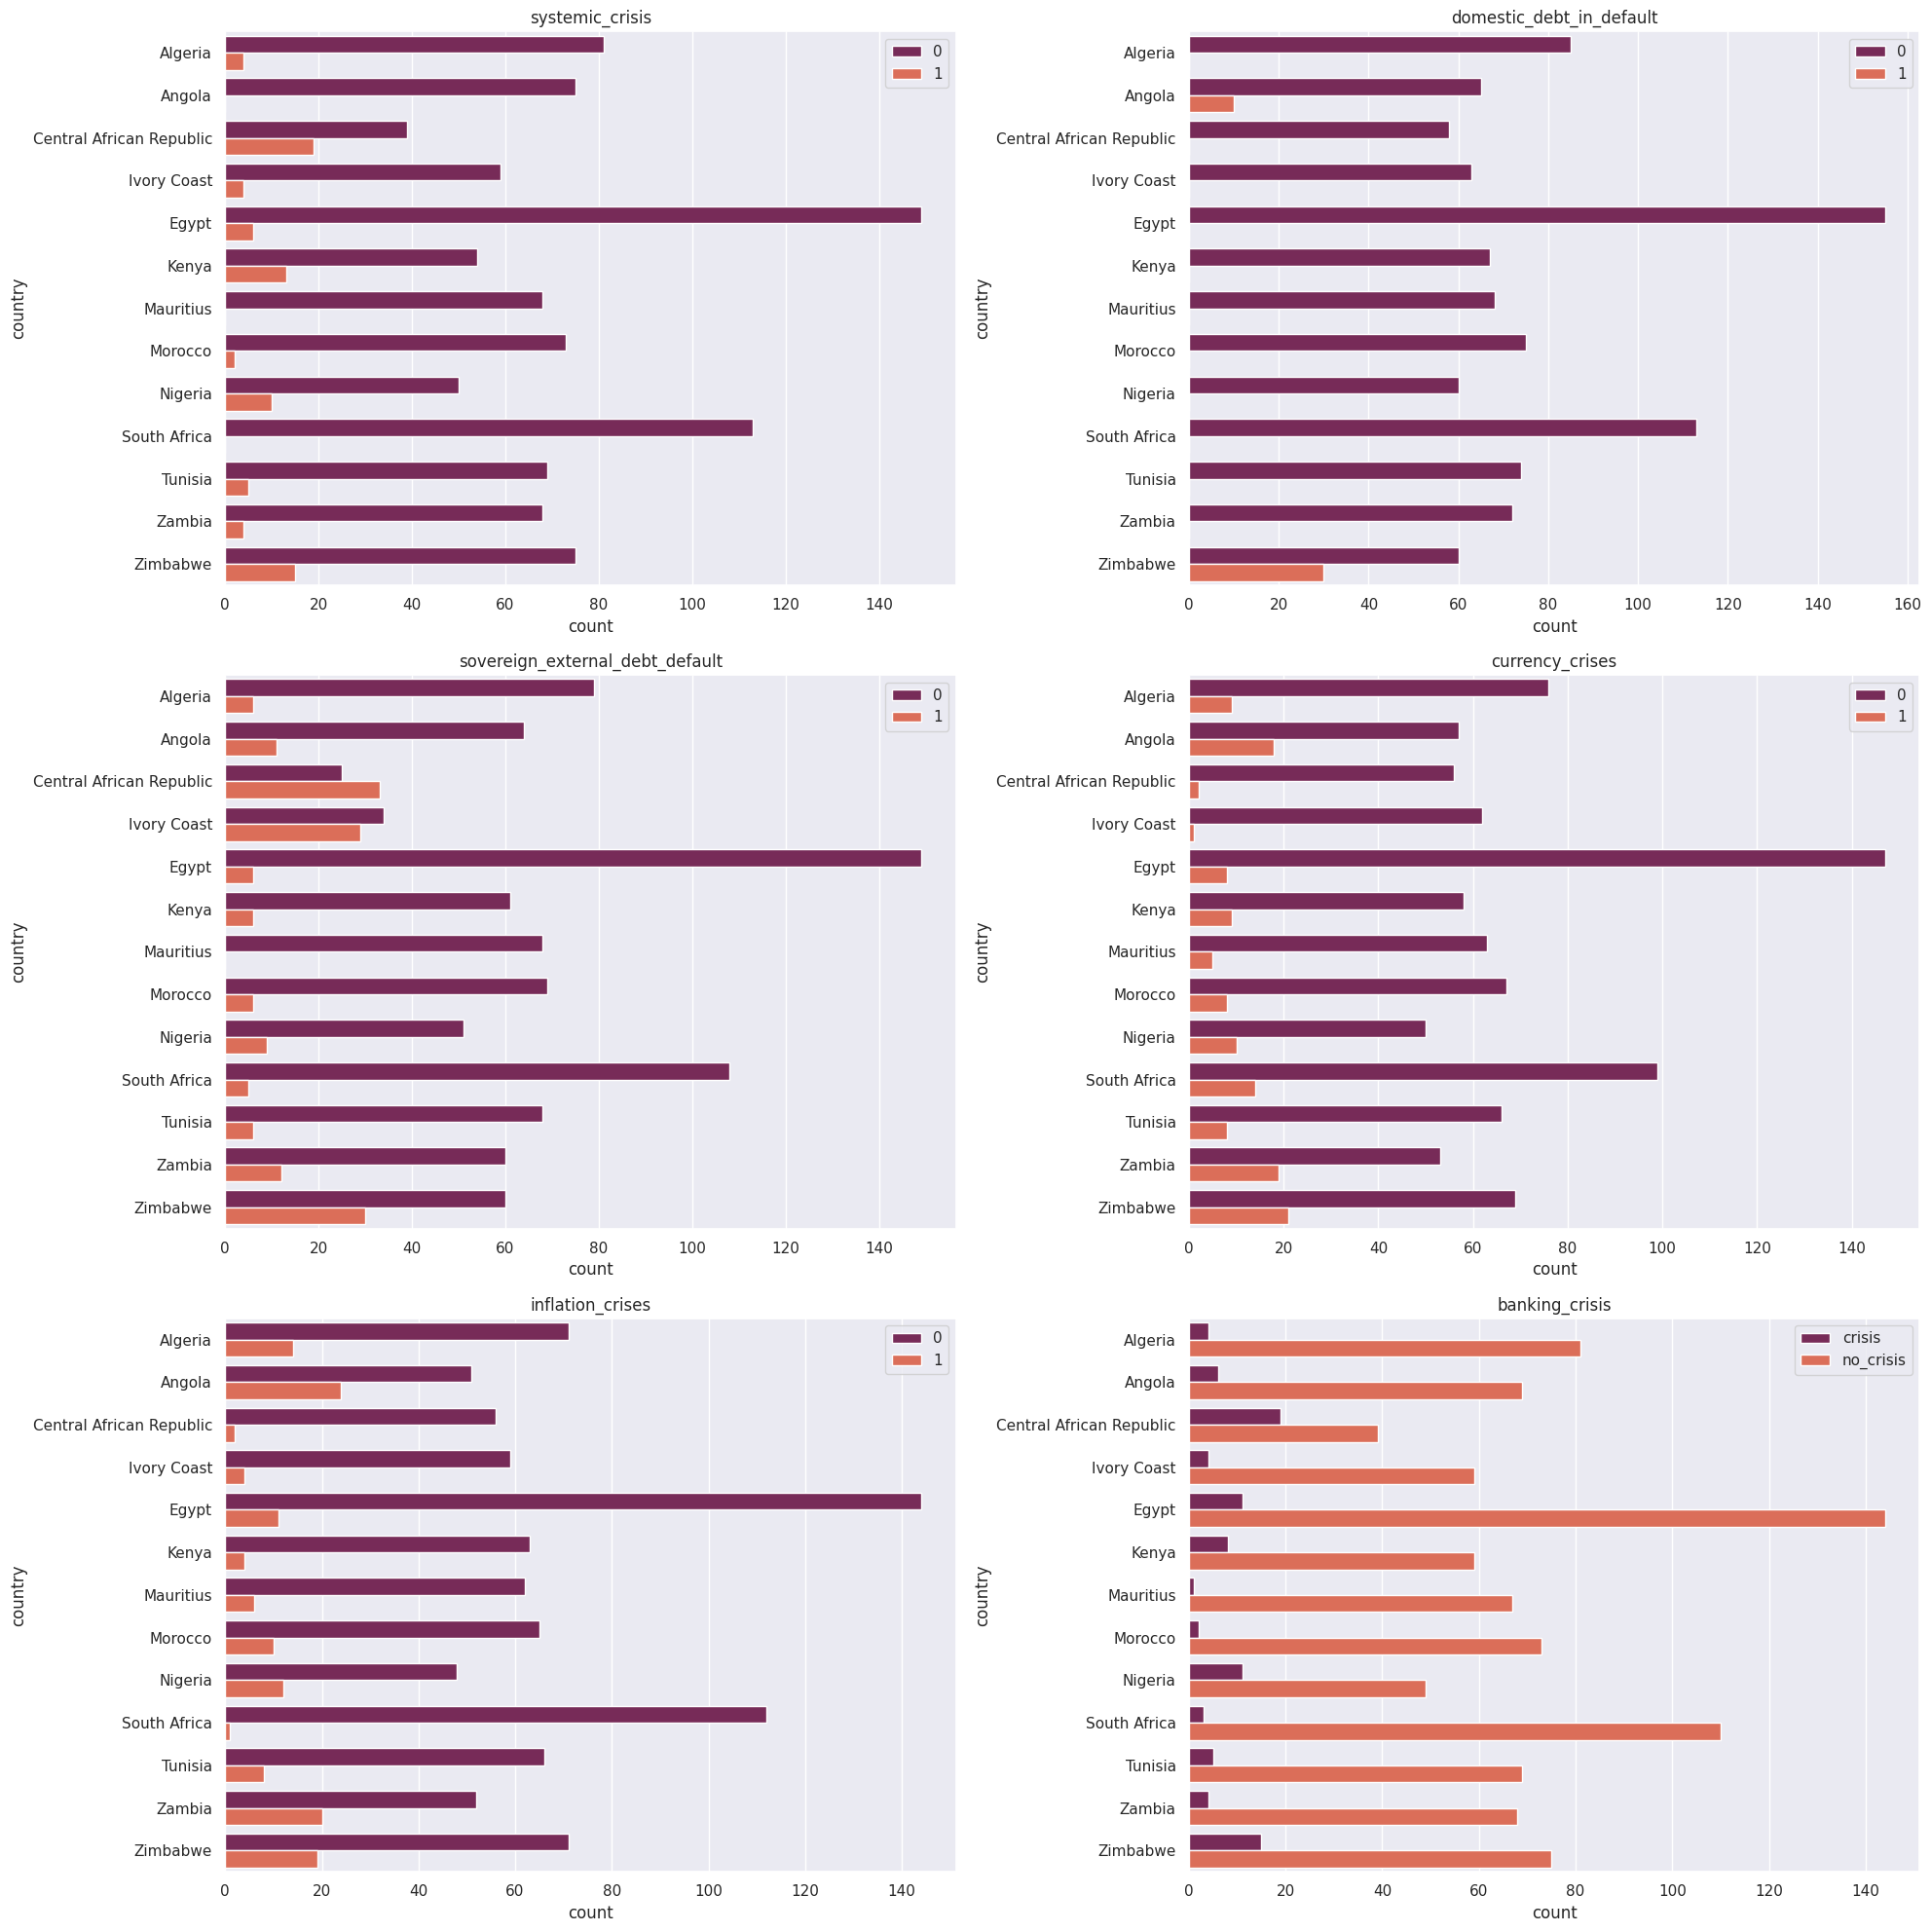

In [5]:
# Quick Visualization
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=df.country,hue=df[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

In [4]:
# Backup Original Data
df_or = df.copy()

In [5]:
# Convert data to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [6]:
# Count value categories every column after LabelEncoder
temp = ['systemic_crisis','domestic_debt_in_default', 'sovereign_external_debt_default', 'currency_crises', 'inflation_crises', 'banking_crisis']

for col in temp:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df[col].value_counts(), '\n')

systemic_crisis 
--------------------
systemic_crisis
0    973
1     82
Name: count, dtype: int64 

domestic_debt_in_default 
--------------------
domestic_debt_in_default
0    1015
1      40
Name: count, dtype: int64 

sovereign_external_debt_default 
--------------------
sovereign_external_debt_default
0    896
1    159
Name: count, dtype: int64 

currency_crises 
--------------------
currency_crises
0    923
1    132
Name: count, dtype: int64 

inflation_crises 
--------------------
inflation_crises
0    920
1    135
Name: count, dtype: int64 

banking_crisis 
--------------------
banking_crisis
1    962
0     93
Name: count, dtype: int64 



In [7]:
# Make a list of the variables used
vars = ['systemic_crisis','domestic_debt_in_default', 'sovereign_external_debt_default', 'currency_crises', 'inflation_crises', 'banking_crisis']

In [8]:
# correlation between variables
df[vars].corr()

,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,currency_crises,inflation_crises,banking_crisis
systemic_crisis,1.000000,0.127734,0.253737,0.125626,0.174944,-0.858754
domestic_debt_in_default,0.127734,1.000000,0.457379,0.194934,0.206237,-0.218355
sovereign_external_debt_default,0.253737,0.457379,1.000000,0.177021,0.179674,-0.261504
currency_crises,0.125626,0.194934,0.177021,1.000000,0.395448,-0.165358
inflation_crises,0.174944,0.206237,0.179674,0.395448,1.000000,-0.231188
banking_crisis,-0.858754,-0.218355,-0.261504,-0.165358,-0.231188,1.000000


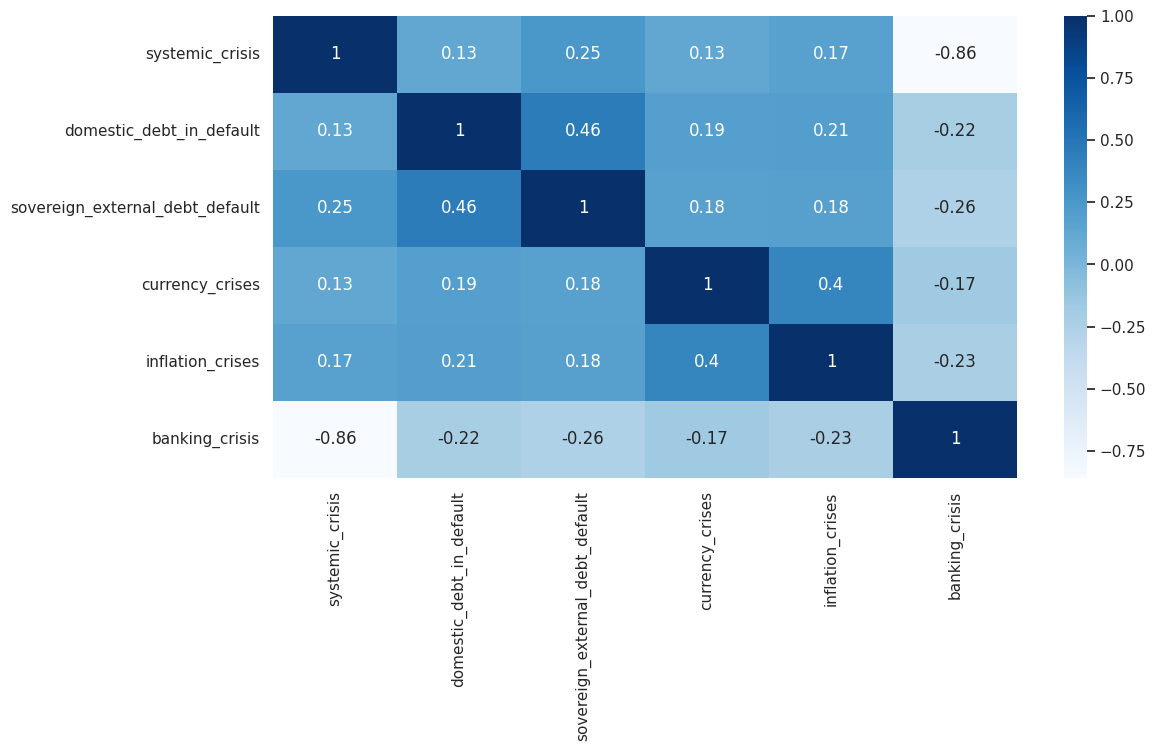

In [16]:
# Visualize correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(df[vars].corr(),annot=True,cmap='Blues')
plt.show()

In [9]:
# Divide the data into “attributes”  X and “labels”  Y 
X = df[['banking_crisis', 'domestic_debt_in_default','sovereign_external_debt_default', 'currency_crises','inflation_crises']]
# Define the Y variable 
Y = df['systemic_crisis']

## percentage of  crisis & no crisis

count_no_crisis = len(df[Y==0])
count_crisis = len(df[Y==1])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 92.22748815165876
percentage of crisis 7.772511848341232


In [10]:
# Dealing with imbalance data

# Import libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Convert resampling results to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
Y_train_resampled = pd.Series(Y_train_resampled, name='target_column')

# Check the amount of data in each class after SMOTE
print("Amount of data after oversampling:")
print(Y_train_resampled.value_counts())

# Proportion of data after oversampling
print("Proportion of no crisis data in oversampled data is", len(Y_train_resampled[Y_train_resampled == 0]) / len(Y_train_resampled))
print("Proportion of crisis data in oversampled data is", len(Y_train_resampled[Y_train_resampled == 1]) / len(Y_train_resampled))


Jumlah data setelah oversampling:
target_column
0    682
1    682
Name: count, dtype: int64
Proportion of no crisis data in oversampled data is 0.5
Proportion of crisis data in oversampled data is 0.5


In [11]:
# Modeling with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using balanced training data
log_reg.fit(X_train_resampled, Y_train_resampled)

# Prediction on testing data
Y_pred = log_reg.predict(X_test)

# Model evaluation
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy Score: 0.9747634069400631
Confusion Matrix:
 [[286   5]
 [  3  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       291
           1       0.82      0.88      0.85        26

    accuracy                           0.97       317
   macro avg       0.91      0.93      0.92       317
weighted avg       0.98      0.97      0.98       317



- Accuracy of logistic regression classifier on test set: 0.97
- Confusion Matrix result telling us that we have 286+23 correct predictions and 3+5 incorrect predictions.

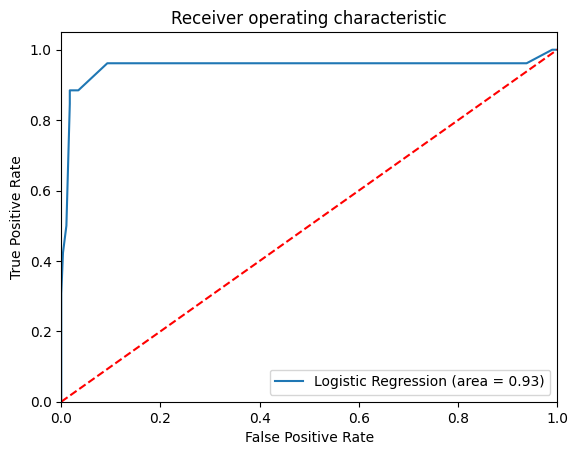

In [12]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The model successfully separates positive and negative well.

In [21]:
# Get Coefficient

# Get feature names from X
feature_names = X.columns

# Take coefficients from the model
coefficients = log_reg.coef_[0]

# Create a DataFrame to display the features and their coefficients.
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

                           Feature  Coefficient
0                   banking_crisis    -7.557136
1         domestic_debt_in_default    -0.908471
2  sovereign_external_debt_default     0.799783
3                  currency_crises    -0.041960
4                 inflation_crises     0.176704


In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Get feature names from X
feature_names = X.columns

model = LogisticRegression()
model.fit(X_train_resampled, Y_train_resampled)

# Get coefficients
coefficients = model.coef_[0]  # Hanya untuk model biner
print("Koefisien:\n", coefficients)

# Count Exp(B)
exp_b = np.exp(coefficients)

# Create a DataFrame to display the features and their Exp
exp_b_df = pd.DataFrame({'Feature': feature_names, 'EXP': exp_b})

print(exp_b_df)


Koefisien:
 [-7.5571362  -0.90847132  0.79978287 -0.04196043  0.17670377]
                           Feature       EXP
0                   banking_crisis  0.000522
1         domestic_debt_in_default  0.403140
2  sovereign_external_debt_default  2.225058
3                  currency_crises  0.958908
4                 inflation_crises  1.193278


In [25]:
# Hitung persentase perubahan dalam kolom 'Change (%)'
coef_df['Exp(B)'] = np.exp(coef_df['Coefficient'])
coef_df['Change (%)'] = np.where(coef_df['Exp(B)'] < 1, 
                                 (1 - coef_df['Exp(B)']) * 100, 
                                 (coef_df['Exp(B)'] - 1) * 100)

# Tentukan deskripsi perubahan dalam kolom 'Change Description'
coef_df['Change Description'] = coef_df.apply(
    lambda row: f"Decrease about {row['Change (%)']:.2f}%" if row['Exp(B)'] < 1 
    else f"Increase about {row['Change (%)']:.2f}%", axis=1
)

# Tampilkan hasil
coef_df


,Feature,Coefficient,Exp(B),Change (%),Change Description
0,banking_crisis,-7.557136,0.000522,99.947763,Decrease about 99.95%
1,domestic_debt_in_default,-0.908471,0.403140,59.685997,Decrease about 59.69%
2,sovereign_external_debt_default,0.799783,2.225058,122.505775,Increase about 122.51%
3,currency_crises,-0.041960,0.958908,4.109227,Decrease about 4.11%
4,inflation_crises,0.176704,1.193278,19.327756,Increase about 19.33%


From the results above, it can be seen that if sovereign external debt default increases by one unit, it will increase the chance of a systemic crisis by around 122.51%, assuming other variables are constant. An increase in foreign debt significantly increases the chance of a systemic crisis.